In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("C:\\Users\\anush\\Desktop\\Obesity ML Research Project\\obesity_pre_processed_data.csv")

# Display the first few rows
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.517665,-1.088317,-1.016339,1,0,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,0.508987,2,3,1
1,0,-0.517665,-2.235215,-1.308625,1,0,0.997767,0.211595,2,1,1.574274,1,2.331641,-1.199517,1,3,1
2,1,-0.038570,0.976100,-0.541374,1,0,-0.823906,0.211595,2,0,-0.074968,0,1.148535,0.508987,0,3,1
3,1,0.919620,0.976100,-0.176016,0,0,0.997767,0.211595,2,0,-0.074968,0,1.148535,-1.199517,0,4,5
4,1,1.398715,-1.088317,-1.418232,0,1,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,-1.199517,1,0,1


In [84]:
# Define features and target variable
y = df['NObeyesdad']
X = df.drop('NObeyesdad', axis=1)

In [86]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.9609929078014184
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.86      1.00      0.92        36
           2       0.95      0.95      0.95        39
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        62
           5       0.96      0.83      0.89        29
           6       0.95      0.91      0.93        43

    accuracy                           0.96       282
   macro avg       0.96      0.95      0.96       282
weighted avg       0.96      0.96      0.96       282

Confusion Matrix:
[[28  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0]
 [ 0  1 37  0  0  0  1]
 [ 0  0  0 45  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  3  1  0  0 24  1]
 [ 0  2  1  0  0  1 39]]


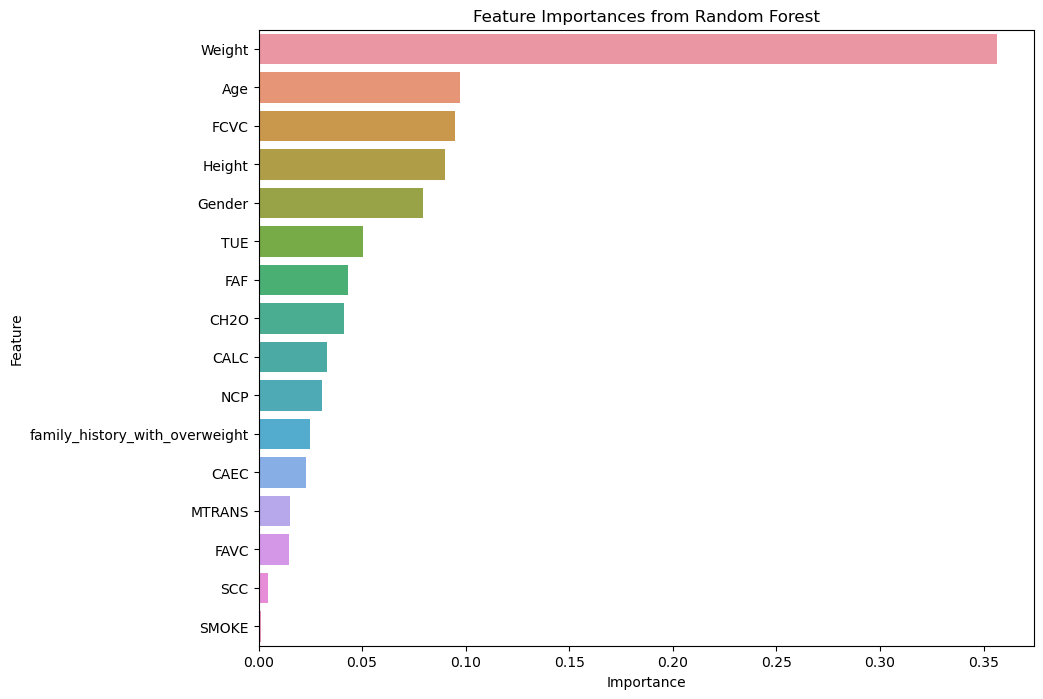

Top 5 important features:
   Feature  Importance
3  Weight    0.356290
1     Age    0.097123
6    FCVC    0.095037
2  Height    0.089846
0  Gender    0.079192


In [94]:
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

# Print the top 5 important features
print("Top 5 important features:\n", feature_importances.head())